# Import and explore Datasets

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

## Savee

### Import the files name

In [2]:
#Path of the audio files
savee="../speech_emotion_reco/data/savee/"
#fill in a list with all the files in the directory
list_files=os.listdir(savee)
#Print first five
print(list_files[0:10])

['JK_sa01.wav', 'JK_sa15.wav', 'DC_n13.wav', 'DC_su09.wav', 'DC_n07.wav', 'JK_n20.wav', 'JK_n08.wav', 'JE_sa08.wav', 'JK_f15.wav', 'JK_f01.wav']


### Build the data set with emotions 

In [3]:
#file the emotion variable from the path
emotion=[]
path=[]

for file in list_files:
    if file[2:4]=="_a":
        emotion.append('angry')
    elif file[2:4]=="_d":
        emotion.append('disgust')
    elif file[2:4]=="_f":
        emotion.append('fear')
    elif file[2:4]=="_h":
        emotion.append('happy')
    elif file[2:4]=="_n":
        emotion.append('neutral')
    elif file[2:5]=="_sa":
        emotion.append('sad')
    elif file[2:5]=="_su":
        emotion.append('surprise')
    else:
        emotion.append('unknown')
    path.append(savee+file)

In [4]:
#Create dataframe

savee_df= pd.DataFrame(emotion, columns=["emotion"])
savee_df= pd.concat([savee_df, pd.DataFrame(path, columns=["path"])],axis=1)

In [5]:
#print head
savee_df.head()

,emotion,path
0,sad,../speech_emotion_reco/data/savee/JK_sa01.wav
1,sad,../speech_emotion_reco/data/savee/JK_sa15.wav
2,neutral,../speech_emotion_reco/data/savee/DC_n13.wav
3,surprise,../speech_emotion_reco/data/savee/DC_su09.wav
4,neutral,../speech_emotion_reco/data/savee/DC_n07.wav


### Graph visu

<AxesSubplot:xlabel='emotion', ylabel='count'>

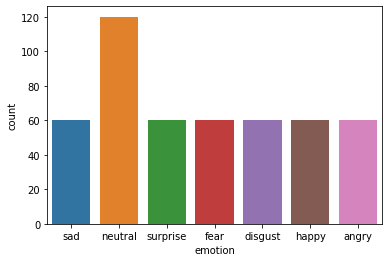

In [6]:
#Visualization 
sns.countplot(x=savee_df["emotion"])

### display sound

In [7]:
file= savee_df.iloc[0,1]

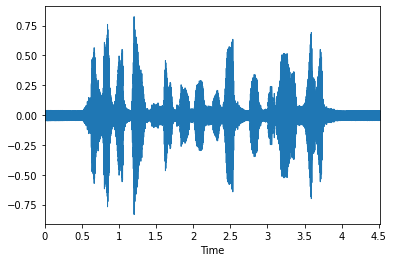

In [8]:
data, sampling_rate= librosa.load(file)
librosa.display.waveplot(data, sr= sampling_rate)
ipd.Audio(file)

### Summary

- Balanced emotions
- 4 men from 27 to 31 years
- 7 emotions 
- 15 different sentences by emotion 
- 480 observations 


## Ravdess

### Import files names

In [9]:
#Path of the audio files
ravdess="../speech_emotion_reco/data/ravdess/"
#fill in a list with all the files in the directory
list_files_2=os.listdir(ravdess)
#Print first five
print(list_files_2[0:10])

['03-01-06-01-02-02-02.wav', '03-01-05-01-02-01-16.wav', '03-01-08-01-01-01-14.wav', '03-01-06-01-02-02-16.wav', '03-01-05-01-02-01-02.wav', '03-01-01-01-02-02-06.wav', '03-01-02-01-02-01-12.wav', '03-01-01-01-02-02-12.wav', '03-01-02-01-02-01-06.wav', '03-01-02-02-01-01-06.wav']


### Build the data set with emotions and gender

In [10]:
emotion_2=[]
gender=[]
path_2=[]
for file in list_files_2:
    part= file.split('.')[0].split('-')
    emotion_2.append(int(part[2]))
    gend= int(part[6])
    if gend%2==0:
        gend="female"
    else:
        gend="male"
    gender.append(gend)
    path_2.append(ravdess+file)
ravdess_df= pd.DataFrame(emotion_2)

In [11]:
#replace integer by the emotion name and add path
dict_emotions={1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}
ravdess_df.replace(dict_emotions, inplace= True)
ravdess_df= pd.concat([pd.DataFrame(gender), ravdess_df], axis=1)
ravdess_df.columns=["gender","emotion"]
ravdess_df=pd.concat([ravdess_df, pd.DataFrame(path_2, columns=["path"])], axis=1)
ravdess_df.head()

,gender,emotion,path
0,female,fear,../speech_emotion_reco/data/ravdess/03-01-06-0...
1,female,angry,../speech_emotion_reco/data/ravdess/03-01-05-0...
2,female,surprise,../speech_emotion_reco/data/ravdess/03-01-08-0...
3,female,fear,../speech_emotion_reco/data/ravdess/03-01-06-0...
4,female,angry,../speech_emotion_reco/data/ravdess/03-01-05-0...


### Graph visu

<AxesSubplot:xlabel='emotion', ylabel='count'>

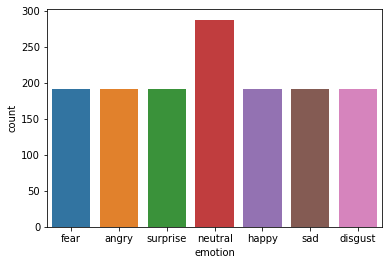

In [12]:
#Visualization 
sns.countplot(x=ravdess_df["emotion"])

### Display Sound

In [13]:
sound_1= ravdess_df.iloc[0,2]

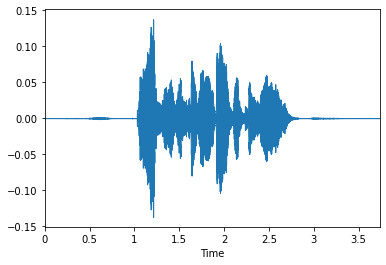

In [14]:
data_1, sampling_rate_1= librosa.load(sound_1)
librosa.display.waveplot(data_1, sr= sampling_rate_1)
ipd.Audio(sound_1)

### Summary

- Balanced emotions
- 24 actors (12 men, 12 women)
- 7 emotions
- 2 emotion intensities: normal and strong
- 2 different sentences by emotion
- 2 repetitions 
- 1440 observations

## Tess

### import files names

In [15]:
tess="../speech_emotion_reco/data/tess/"
list_files= os.listdir(tess)

emotion_3=[]
path_3=[]
for directory in list_files:
    file_name_3=os.listdir(tess+directory)
    for file in file_name_3:
        if directory=="OAF_angry" or directory=="YAF_angry":
            emotion_3.append("female_angry")
        elif directory=="OAF_disgust" or directory=="YAF_disgust":
            emotion_3.append("female_disgust")
        elif directory=="OAF_Fear" or directory=="YAF_fear":
            emotion_3.append("female_fear")
        elif directory=="OAF_happy" or directory=="YAF_happy":
            emotion_3.append("female_happy")
        elif directory=="OAF_neutral" or directory=="YAF_neutral":
            emotion_3.append("female_neutral")
        elif directory=="OAF_Pleasant_surprise" or directory=="YAF_pleasant_surprise":
            emotion_3.append("female_surprise")
        elif directory=="OAF_Sad" or directory=="YAF_sad":
            emotion_3.append("female_sad")
        else:
            emotion_3.append("Unknown")
        path_3.append(tess+directory+"/"+file)

### Build the data set with emotions and gender

In [16]:
tess_df = pd.DataFrame(emotion_3, columns=["emotion"])
tess_df= pd.concat([tess_df, pd.DataFrame(path_3, columns=["path"])], axis=1)


In [17]:
tess_df.head()

,emotion,path
0,female_disgust,../speech_emotion_reco/data/tess/YAF_disgust/Y...
1,female_disgust,../speech_emotion_reco/data/tess/YAF_disgust/Y...
2,female_disgust,../speech_emotion_reco/data/tess/YAF_disgust/Y...
3,female_disgust,../speech_emotion_reco/data/tess/YAF_disgust/Y...
4,female_disgust,../speech_emotion_reco/data/tess/YAF_disgust/Y...


### Graph visu

<AxesSubplot:xlabel='emotion', ylabel='count'>

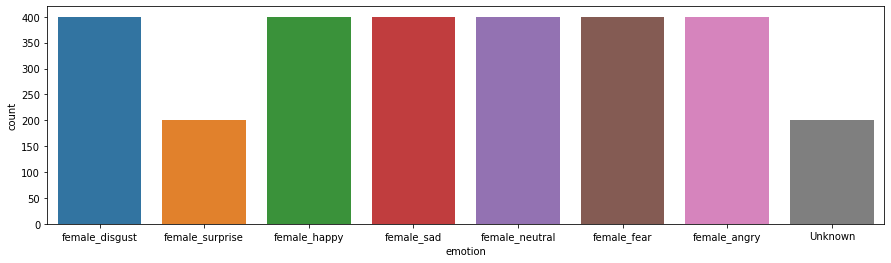

In [18]:
plt.figure(figsize=(15,4))
sns.countplot(x=tess_df["emotion"])

### Display Sound

In [19]:
sound_2= tess_df.iloc[0,1]

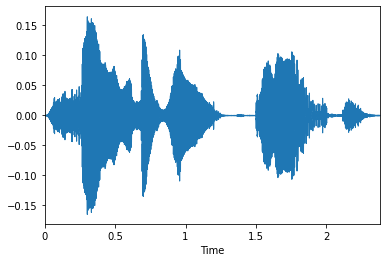

In [20]:
data_2, sampling_rate_2= librosa.load(sound_2)
librosa.display.waveplot(data_2, sr= sampling_rate_2)
ipd.Audio(sound_2)

### Summary

- Balanced emotions
- 2 actors (2 women)
- 7 emotions + Unknown
- 200 different words by emotion
- 2800 observations

## Crema -D

### Import files names

### Import files names

In [21]:
crema= "../speech_emotion_reco/data/crema/"
list_files_4= os.listdir(crema)

#numbers for women
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]
gender_4=[]
path_4=[]
emotion_4=[]


In [22]:
for file in list_files_4:
    part= file.split("_")
    if int(part[0]) in female:
        gend="female"
    else:
        gend="male"
    gender_4.append(gend)
    if part[2]=="SAD":
        emotion_4.append("sad")
    elif part[2]=="ANG":
        emotion_4.append("angry")
    elif part[2]=="DIS":
        emotion_4.append("disgust")
    elif part[2]=="FEA":
        emotion_4.append("fear")
    elif part[2]=="HAP":
        emotion_4.append("happy")
    elif part[2]=="NEU":
        emotion_4.append("neutral")
    else:
        emotion_4.append("unknown")
    path_4.append(crema+file)
        

### Build the data set

In [23]:
crema_df= pd.DataFrame(emotion_4, columns=["emotion"])
crema_df= pd.concat([pd.DataFrame(gender_4, columns=["gender"]), crema_df,pd.DataFrame(path_4, columns=["path"])], axis=1)

In [24]:
crema_df.head(10
             )


,gender,emotion,path
0,male,angry,../speech_emotion_reco/data/crema/1022_ITS_ANG...
1,female,angry,../speech_emotion_reco/data/crema/1037_ITS_ANG...
2,female,neutral,../speech_emotion_reco/data/crema/1060_ITS_NEU...
3,female,neutral,../speech_emotion_reco/data/crema/1075_ITS_NEU...
4,female,disgust,../speech_emotion_reco/data/crema/1073_IOM_DIS...
5,male,disgust,../speech_emotion_reco/data/crema/1066_IOM_DIS...
6,female,sad,../speech_emotion_reco/data/crema/1078_IWL_SAD...
7,female,fear,../speech_emotion_reco/data/crema/1029_TAI_FEA...
8,male,sad,../speech_emotion_reco/data/crema/1039_IEO_SAD...
9,female,happy,../speech_emotion_reco/data/crema/1008_TAI_HAP...


<AxesSubplot:xlabel='emotion', ylabel='count'>

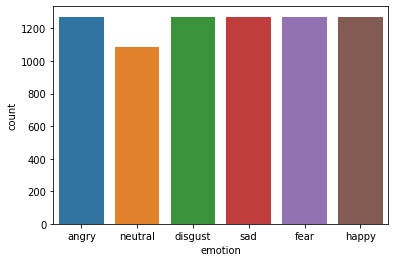

In [25]:
sns.countplot(x= crema_df["emotion"])

### Display sound

In [26]:
sound_4= crema_df.iloc[25,2]

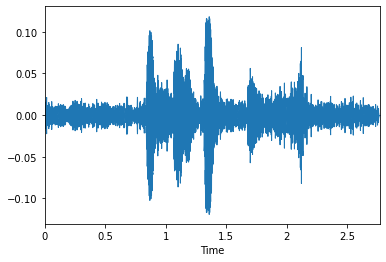

In [27]:
data_4, sampling_rate_4= librosa.load(sound_4)
librosa.display.waveplot(data_4, sr= sampling_rate_4)
ipd.Audio(sound_4)

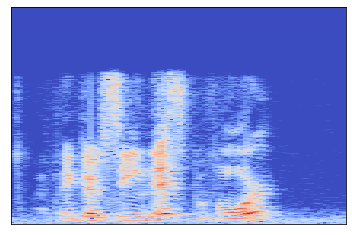

In [28]:
##### Fear
sound_4= crema_df.iloc[0,2]
data_4, sampling_rate_4= librosa.load(sound_4)
fourier= librosa.stft(data_4)
amp= librosa.amplitude_to_db(abs(fourier))
librosa.display.specshow(amp, sr=sampling_rate_4)

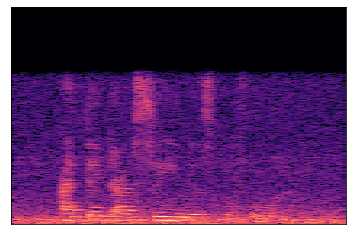

In [29]:
##### disgust
sound_4= crema_df.iloc[2,2]
data_4, sampling_rate_4= librosa.load(sound_4)
fourier= librosa.stft(data_4)
amp= librosa.amplitude_to_db(abs(fourier))
librosa.display.specshow(amp, sr=sampling_rate_4)

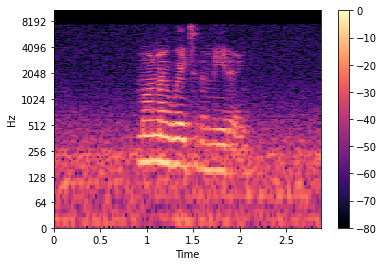

In [30]:
sound_4= crema_df.iloc[4,2]
data_4, sampling_rate_4= librosa.load(sound_4)
fourier= librosa.stft(data_4)
DB = librosa.amplitude_to_db(abs(fourier), ref=np.max)

librosa.display.specshow(DB, sr=sampling_rate_4, x_axis="time", y_axis="log")
plt.colorbar()



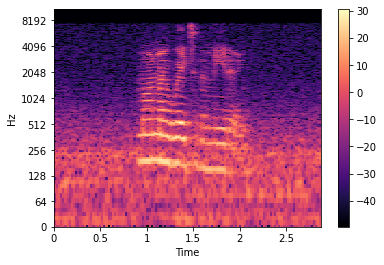

In [31]:
##### sad
sound_4= crema_df.iloc[4,2]
data_4, sampling_rate_4= librosa.load(sound_4)
fourier= librosa.stft(data_4)
amp= librosa.amplitude_to_db(abs(fourier))
librosa.display.specshow(amp, sr=sampling_rate_4, x_axis="time", y_axis="log")
plt.colorbar()

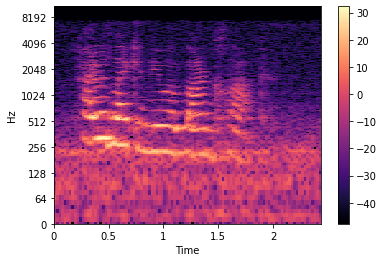

In [32]:
##### happy
sound_4= crema_df.iloc[6,2]
data_4, sampling_rate_4= librosa.load(sound_4)
fourier= librosa.stft(data_4)
amp= librosa.amplitude_to_db(abs(fourier))
librosa.display.specshow(amp, sr=sampling_rate_4, x_axis="time", y_axis="log")
plt.colorbar()

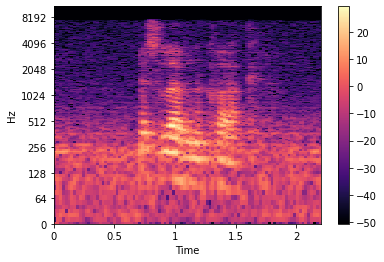

In [33]:
##### angry
sound_4= crema_df.iloc[8,2]
data_4, sampling_rate_4= librosa.load(sound_4)
fourier= librosa.stft(data_4)
amp= librosa.amplitude_to_db(abs(fourier))
librosa.display.specshow(amp, sr=sampling_rate_4, x_axis="time", y_axis="log")
plt.colorbar()

### Summary

- Balanced emotions
- 91 actors (48 women, 43 men)
- 6 emotions (we don't have suprise in this dataset)
- 12 different sentence by emotion
- 7.442 observations

# Transform into spectogram

## Using Crema data set 

### Happy without transformation

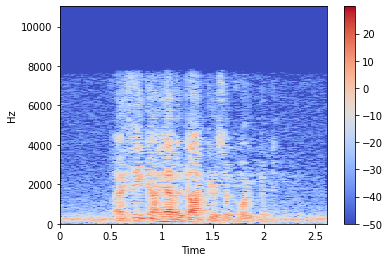

In [79]:
##### happy
sound_4= crema_df.iloc[6,2]
data_4, sampling_rate_4= librosa.load(sound_4)
fourier= librosa.stft(data_4)
amp= librosa.amplitude_to_db(abs(fourier))
librosa.display.specshow(amp, sr=sampling_rate_4, x_axis="time", y_axis="hz")
plt.colorbar()

### Happy with log transformation

<ipython-input-86-65b9029d56d2>:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('image2_test.png', optimize=True)


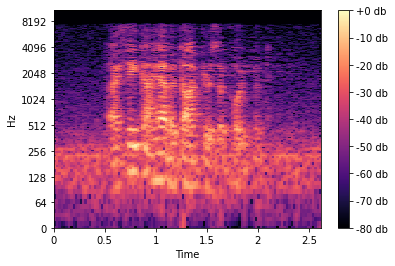

In [86]:
#Happy

sound_4= crema_df.iloc[6,2]
data_4, sampling_rate_4= librosa.load(sound_4)
fourier= librosa.stft(data_4)
amp = librosa.amplitude_to_db(abs(fourier), ref=np.max)
librosa.display.specshow(amp, sr=sampling_rate_4, x_axis="time", y_axis="log")
plt.colorbar(format='%+2.0f db')
plt.savefig('image2_test.png', optimize=True)

In [90]:
crema_df

,gender,emotion,path
0,female,fear,../data/crema/1004_IWL_FEA_XX.wav
1,male,unknown,../data/crema/1083_IEO_DIS_MD.wav
2,male,disgust,../data/crema/1070_IOM_SAD_XX.wav
3,female,unknown,../data/crema/1043_IEO_HAP_LO.wav
4,male,sad,../data/crema/1017_IEO_ANG_MD.wav
5,female,unknown,../data/crema/1061_ITS_ANG_XX.wav
6,male,happy,../data/crema/1001_ITH_NEU_XX.wav
7,male,unknown,../data/crema/1083_DFA_DIS_XX.wav
8,male,angry,../data/crema/1017_ITS_FEA_XX.wav
9,female,unknown,../data/crema/1004_TIE_SAD_XX.wav


In [1]:
!ls

EDA.ipynb			  mateo_saving_spect_as_image.ipynb
mateo_data_exploration.ipynb	  raph_data_merge.ipynb
mateo_first_neural_network.ipynb  raph_transform_images_to_array.ipynb
